In [7]:
# Importing the Keras libraries and packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
image_shape=(224,224,3)


In [2]:
#Load the pretrained Network
#vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height,img_width,3), pooling=None, classes=1000)

vgg16_model=tf.keras.applications.VGG16(input_shape=image_shape,
                                               include_top=False,
                                             weights='imagenet')
print("pretrained Network is loaded")

2022-02-19 16:41:57.742682: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-19 16:41:57.743953: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-19 16:41:57.843299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-19 16:41:57.843362: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-19 16:41:57.847249: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-19 16:41:57.847365: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0

pretrained Network is loaded


In [3]:
# Freeze the layers
for layer in vgg16_model.layers:
    layer.trainable = False
print("Pretrained layers are freezed")

Pretrained layers are freezed


In [4]:
from tensorflow.keras.models import Sequential
model=Sequential()
print("Model is intianiated")

Model is intianiated


In [5]:
model.add(vgg16_model)
#model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
hidden_layer=model.add(Dense(128, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(64, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(1, activation='sigmoid', name='output_layer')) 
print("All layers top of pretrained layers are developed")

All layers top of pretrained layers are developed


https://www.kaggle.com/blurredmachine/alexnet-architecture-a-complete-guide

In [8]:
# Input parameter
#train_data_dir ='/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir'
train_data_dir='/home/poornima/Data/GDPS/train_dir/'
val_data_dir ='/home/poornima/Data/GDPS/val_dir/'
model_weights_file = '/home/poornima/Data/GDPS/model_vgg16_weights.hdf5'
nb_epochs = 100
print("Input parameters are assigned")

Input parameters are assigned


In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [9]:
# image data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 224, 224
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False,class_mode='binary')

Found 172800 images belonging to 2 classes.
Found 43200 images belonging to 2 classes.


In [9]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
filepath = "/home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

In [10]:
#callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit(train_generator, epochs=nb_epochs, validation_data=validation_generator, callbacks=[checkpoint,early])

print('Training Completed!')

2022-02-19 16:42:48.229139: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-19 16:42:48.231202: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/100


2022-02-19 16:42:48.790213: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-19 16:42:49.022955: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-19 16:42:50.144134: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-19 16:42:50.233041: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


10800/10800 [==============================] - 2081s 191ms/step - loss: 0.6896 - accuracy: 0.5531 - val_loss: 0.6585 - val_accuracy: 0.6223

Epoch 00001: val_accuracy improved from -inf to 0.62234, saving model to /home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-01-0.62.h5
Epoch 2/100
10800/10800 [==============================] - 2049s 190ms/step - loss: 0.6610 - accuracy: 0.6015 - val_loss: 0.6419 - val_accuracy: 0.6289

Epoch 00002: val_accuracy improved from 0.62234 to 0.62894, saving model to /home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-02-0.63.h5
Epoch 3/100
10800/10800 [==============================] - 2052s 190ms/step - loss: 0.6525 - accuracy: 0.6127 - val_loss: 0.6819 - val_accuracy: 0.5689

Epoch 00003: val_accuracy did not improve from 0.62894
Epoch 4/100
10800/10800 [==============================] - 2053s 190ms/step - loss: 0.6460 - accuracy: 0.6204 - val_loss: 0.6314 - val_accuracy: 0.6383

Epoch 00004: val_accuracy improved from 0.62894 to 0.63831, saving m

Epoch 35/100
10800/10800 [==============================] - 2053s 190ms/step - loss: 0.6066 - accuracy: 0.6614 - val_loss: 0.6072 - val_accuracy: 0.6572

Epoch 00035: val_accuracy did not improve from 0.65910
Epoch 36/100
10800/10800 [==============================] - 2046s 189ms/step - loss: 0.6055 - accuracy: 0.6615 - val_loss: 0.6104 - val_accuracy: 0.6505

Epoch 00036: val_accuracy did not improve from 0.65910
Epoch 37/100
10800/10800 [==============================] - 2053s 190ms/step - loss: 0.6056 - accuracy: 0.6617 - val_loss: 0.6132 - val_accuracy: 0.6537

Epoch 00037: val_accuracy did not improve from 0.65910
Epoch 38/100
10800/10800 [==============================] - 2054s 190ms/step - loss: 0.6019 - accuracy: 0.6669 - val_loss: 0.6055 - val_accuracy: 0.6580

Epoch 00038: val_accuracy did not improve from 0.65910
Epoch 39/100
10800/10800 [==============================] - 2052s 190ms/step - loss: 0.6004 - accuracy: 0.6710 - val_loss: 0.6078 - val_accuracy: 0.6599

Epoch 0003

10800/10800 [==============================] - 2048s 190ms/step - loss: 0.5635 - accuracy: 0.7001 - val_loss: 0.5969 - val_accuracy: 0.6694

Epoch 00072: val_accuracy did not improve from 0.66956
Epoch 73/100
10800/10800 [==============================] - 2051s 190ms/step - loss: 0.5676 - accuracy: 0.6961 - val_loss: 0.6069 - val_accuracy: 0.6694

Epoch 00073: val_accuracy did not improve from 0.66956
Epoch 74/100
10800/10800 [==============================] - 2043s 189ms/step - loss: 0.5596 - accuracy: 0.7017 - val_loss: 0.7187 - val_accuracy: 0.6203

Epoch 00074: val_accuracy did not improve from 0.66956
Epoch 75/100
10800/10800 [==============================] - 2045s 189ms/step - loss: 0.5655 - accuracy: 0.6969 - val_loss: 0.6083 - val_accuracy: 0.6646

Epoch 00075: val_accuracy did not improve from 0.66956
Epoch 76/100
10800/10800 [==============================] - 2048s 190ms/step - loss: 0.5597 - accuracy: 0.7012 - val_loss: 0.6284 - val_accuracy: 0.6596

Epoch 00076: val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


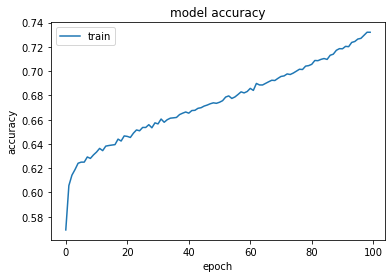

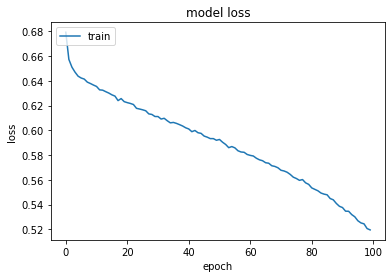

In [11]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
 # save model and architecture to single file
model.save('/home/poornima/Data/GDPS/VGG16/novel_model_verification_GDPS_sgd.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128    
_________________________________________________________________
classification_layer (Dense) (None, 64)                8

In [13]:
# save weights to single file
model.save_weights('/home/poornima/Data/GDPS/VGG16/novel_model_verification_weights_GDPS_SGD.h5')
print("Weights saved in local  Drive")

Weights saved in local  Drive


In [15]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/home/poornima/Data/GDPS/VGG16/novel_model_verification_GDPS_sgd.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128    
_________________________________________________________________
classification_layer (Dense) (None, 64) 

In [27]:
# Extracting Features from classification Layer
from tensorflow.keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [28]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [29]:
# Saving intermediate model
intermediate_layer_model.save('/home/poornima/Data/GDPS/VGG16/intermediate_model_vgg16_GDPS_SGD.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128

In [30]:
# Loading Intermediate Model
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/VGG16/intermediate_model_vgg16_GDPS_SGD.h5')
print("Intermediate model is loaded")

Intermediate model is loaded


In [31]:
# Training Label feature identification(y_train)

batch_size=16
sample_count=172800
features = np.zeros(shape=(172800, 64))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(172800))
i = 0
for inputs_batch, labels_batch in train_generator:
   features_batch = model.predict(inputs_batch)
   features[i * batch_size: (i + 1) * batch_size] = features_batch
   labels[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels.shape)

(172800,)


In [32]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=np.expand_dims(labels, axis=1)
print(labels_train.shape)
print(labels_train)
print(features_train)

(172800, 64)
(172800, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[[0.26009983 0.09543025 0.         ... 0.         0.         0.        ]
 [0.06663223 0.         0.         ... 0.         0.17509517 0.        ]
 [0.70228386 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.08657539 0.42975542 0.        ]
 [0.         0.         0.         ... 0.04566622 0.4945823  0.        ]
 [0.         0.         0.         ... 0.         0.16516799 0.        ]]


In [33]:
# identification of test labels
import numpy as np
batch_size=16
sample_count=43200
features_test = np.zeros(shape=(43200, 64))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(43200))
i = 0
for inputs_batch, labels_batch in validation_generator:
   features_batch = model.predict(inputs_batch)
   features_test[i * batch_size: (i + 1) * batch_size] = features_batch
   labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

(43200,)
(43200, 64)
[0. 0. 0. ... 1. 1. 1.]


In [34]:
# #identification of testing Labels
print(features_test.shape)
labels_test=np.expand_dims(labels_test, axis=1)
print(labels_test.shape)
print(features_test)

(43200, 64)
(43200, 1)
[[0.22274882 0.         0.         ... 0.         0.         0.        ]
 [0.03555851 0.         0.         ... 0.         0.05140381 0.        ]
 [0.04821665 0.         0.         ... 0.         0.01655199 0.        ]
 ...
 [0.42892337 0.         0.         ... 0.         0.         0.        ]
 [0.33951366 0.         0.         ... 0.         0.         0.        ]
 [0.44695824 0.         0.         ... 0.         0.         0.        ]]


In [35]:
# SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[18418  5582]
 [ 8570 10630]]
Accuracy: 67.241
Precision: 65.569
Recall: 55.365
F-Measure: 60.036


In [36]:
# Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[18212  5788]
 [ 8293 10907]]
Accuracy: 67.405
Precision: 65.331
Recall: 56.807
F-Measure: 60.772


In [37]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[18903  5097]
 [10016  9184]]
Accuracy: 65.016
Precision: 64.309
Recall: 47.833
F-Measure: 54.861


In [38]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[18903  5097]
 [10016  9184]]
Accuracy: 65.016
Precision: 64.309
Recall: 47.833
F-Measure: 54.861


In [40]:
# Naive Bayes
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[12836 11164]
 [ 3869 15331]]
Accuracy: 65.201
Precision: 57.864
Recall: 79.849
F-Measure: 67.101


In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[17705  6295]
 [ 9027 10173]]
Accuracy: 64.532
Precision: 61.774
Recall: 52.984
F-Measure: 57.043


In [42]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[18316  5684]
 [ 8478 10722]]
Accuracy: 67.218
Precision: 65.354
Recall: 55.844
F-Measure: 60.226


In [1]:
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-89-0.68.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
#results = model.evaluate(validation_generator)
#print('test loss, test acc:', results)
print("Model Is Loaded")

2022-02-22 12:26:47.527432: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-22 12:26:48.750395: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-22 12:26:48.751329: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-22 12:26:48.850627: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-22 12:26:48.850666: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-22 12:26:48.852448: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-0


# Evaluate on test data
Model Is Loaded


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know category of Image",  )
output = widgets.Output()

model = load_model('/content/drive/My Drive/Colab Notebooks/Signature Verification vgg16 model GDPS/model_vgg16_GDPS.h5')
img_path = '/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir/forged/cf-001-01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
if(block4_pool_features> 0.5):
  a= 'Genuine'
elif(block4_pool_features< 0.5):
  a='forged'
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Image is  "  + a)

button.on_click(on_button_clicked)
display(button, output)

In [2]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
import pandas as pd
validation_generator.reset
ytesthat = model.predict(validation_generator)
print(ytesthat)
df = pd.DataFrame({
    'filename':validation_generator.filenames,
    'predict':ytesthat[:,0],
    'y':validation_generator.classes
})

2022-02-22 12:31:12.520783: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-22 12:31:12.542858: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz
2022-02-22 12:31:12.812555: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-22 12:31:13.019865: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-22 12:31:14.067660: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-22 12:31:14.155456: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


[[0.4278713 ]
 [0.51972455]
 [0.4986494 ]
 ...
 [0.02257191]
 [0.09484428]
 [0.0543793 ]]


In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df

,filename,predict,y,y_pred
0,forged/cf-001-01.jpg,0.42787,0,0
1,forged/cf-001-02.jpg,0.51972,0,1
2,forged/cf-001-03.jpg,0.49865,0,0
3,forged/cf-001-04.jpg,0.45559,0,0
4,forged/cf-001-05.jpg,0.38370,0,0
...,...,...,...,...
43195,genuine/c-1636-20.jpg,0.09704,1,0
43196,genuine/c-1636-21.jpg,0.04578,1,0
43197,genuine/c-1636-22.jpg,0.02257,1,0
43198,genuine/c-1636-23.jpg,0.09484,1,0


In [12]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified  Validation images : %d'%misclassified['y'].count())

Total misclassified  Validation images : 14014


In [19]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Forged', 'Genuine'], yticklabels=['Cat', 'Dog'] );
plt.xlabel('predicted value')
plt.ylabel('true value');

NameError: name 'sns' is not defined

/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


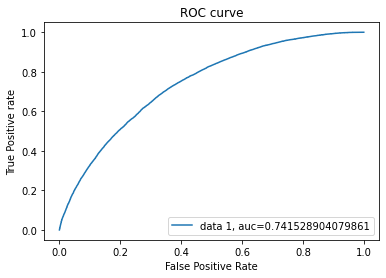

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(validation_generator)[:,0]
fpr, tpr, _ = roc_curve(df.y,  y_pred_proba)
auc = roc_auc_score(df.y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [43]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2022-02-23 10:37:50.044755: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-23 10:37:50.044893: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-23 10:37:50.045159: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-23 10:37:50.045198: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-23 10:37:50.045233: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-02-23 10:37:50.045270: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so